Modelling

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import dataset
df = pd.read_csv("/content/balanced_dataset_lazada.csv")
df.head()

,Ulasan,Compound_Score,Sentiments
0,Why is Lazada this bad?,-0.6280,Negatif
1,damage,-0.4939,Negatif
2,damaged motorbike,-0.4404,Negatif
3,"good, may it always be good, please subscribe",0.7964,Positif
4,I canceled the order because it was more expen...,0.0000,Netral


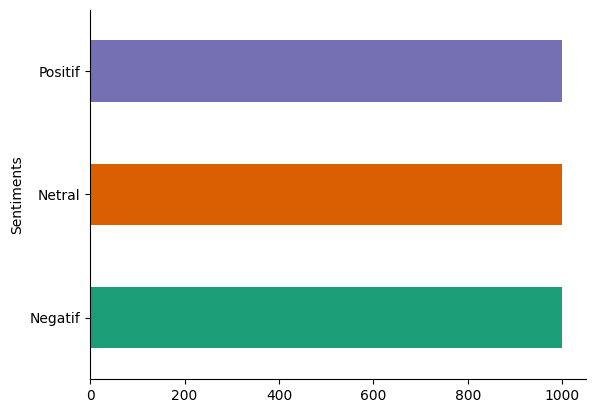

In [ ]:
# @title Sentiments

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Klasifikasi Rf dengan TF-IDF

RASIO PENGUJIAN
90:10
80:20
70:30
60:40
50:50
40:60
30:70
20:80
10:90

**RASIO 90:10**

Random Forest Accuracy: 0.8833333333333333
Random Forest Precision: 0.8888063218487536
Random Forest Recall: 0.8833333333333333
Random Forest F1 Score: 0.883409090909091
Confusion Matrix for Random Forest:
[[97 15  2]
 [ 2 97  3]
 [ 7  6 71]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.92      0.85      0.88       114
      Netral       0.82      0.95      0.88       102
     Positif       0.93      0.85      0.89        84

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



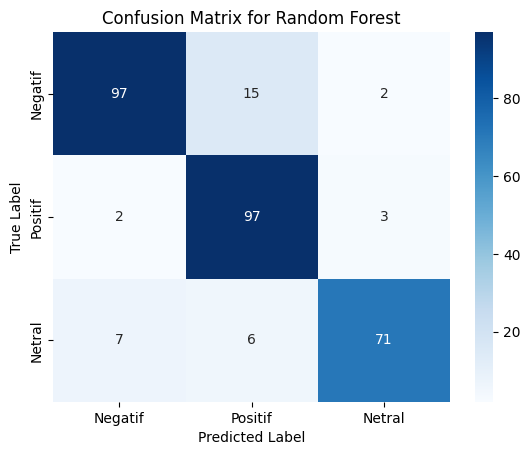

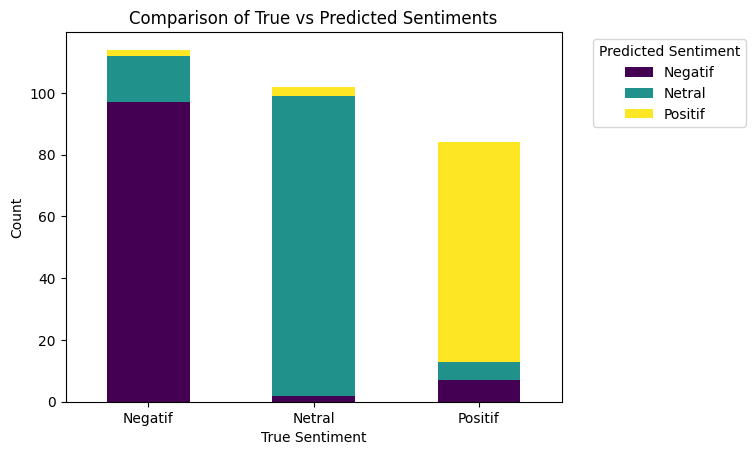

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (90:10)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.10,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 80:20**

Random Forest Accuracy: 0.8766666666666667
Random Forest Precision: 0.8819488491048594
Random Forest Recall: 0.8766666666666667
Random Forest F1 Score: 0.8770725145220276
Confusion Matrix for Random Forest:
[[168  24   3]
 [ 12 194   3]
 [ 20  12 164]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       195
      Netral       0.84      0.93      0.88       209
     Positif       0.96      0.84      0.90       196

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.88       600
weighted avg       0.88      0.88      0.88       600



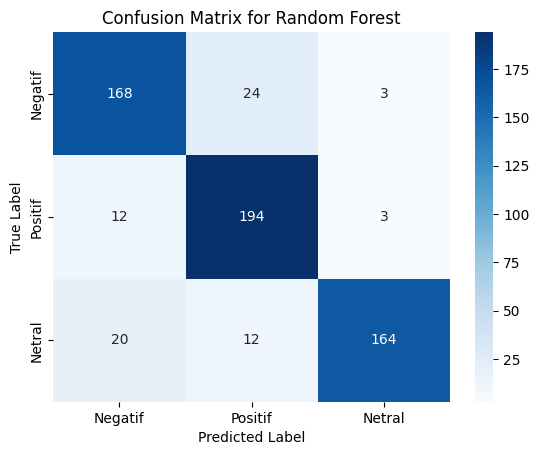

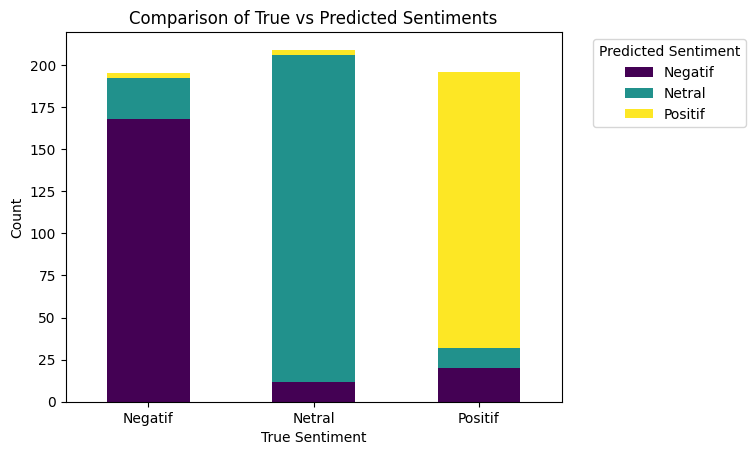

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.20,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 70:30**

Random Forest Accuracy: 0.8644444444444445
Random Forest Precision: 0.8706891849912769
Random Forest Recall: 0.8644444444444445
Random Forest F1 Score: 0.8647866326861052
Confusion Matrix for Random Forest:
[[248  35   4]
 [ 15 274   9]
 [ 40  19 256]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.82      0.86      0.84       287
      Netral       0.84      0.92      0.88       298
     Positif       0.95      0.81      0.88       315

    accuracy                           0.86       900
   macro avg       0.87      0.87      0.86       900
weighted avg       0.87      0.86      0.86       900



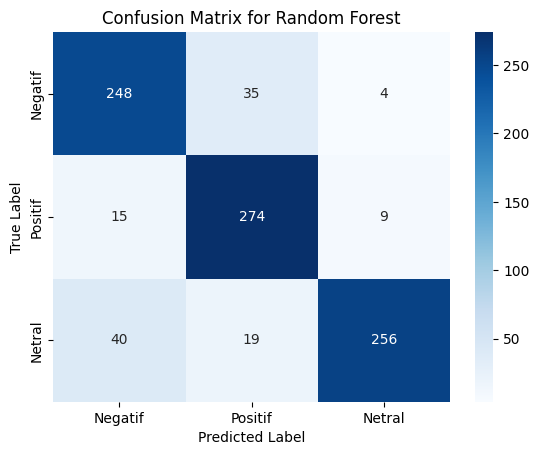

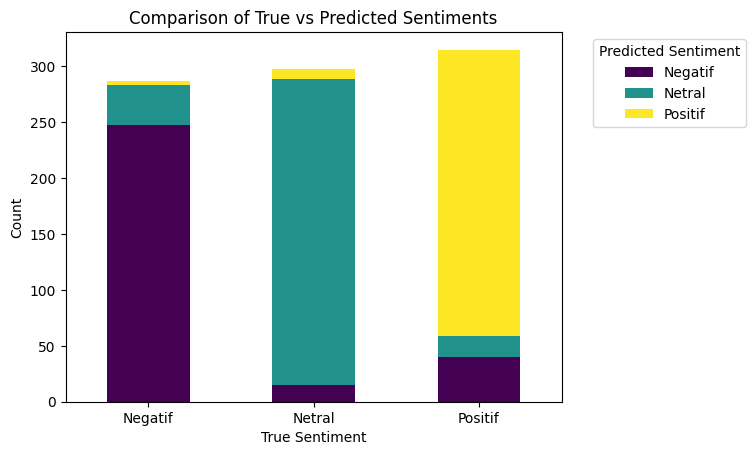

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.30,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 60:40**

Random Forest Accuracy: 0.8725
Random Forest Precision: 0.8776139966463284
Random Forest Recall: 0.8725
Random Forest F1 Score: 0.8726661951909478
Confusion Matrix for Random Forest:
[[343  44   9]
 [ 17 358   9]
 [ 52  22 346]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.83      0.87      0.85       396
      Netral       0.84      0.93      0.89       384
     Positif       0.95      0.82      0.88       420

    accuracy                           0.87      1200
   macro avg       0.88      0.87      0.87      1200
weighted avg       0.88      0.87      0.87      1200



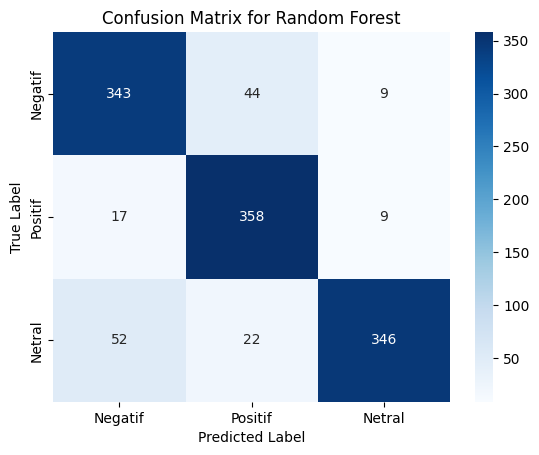

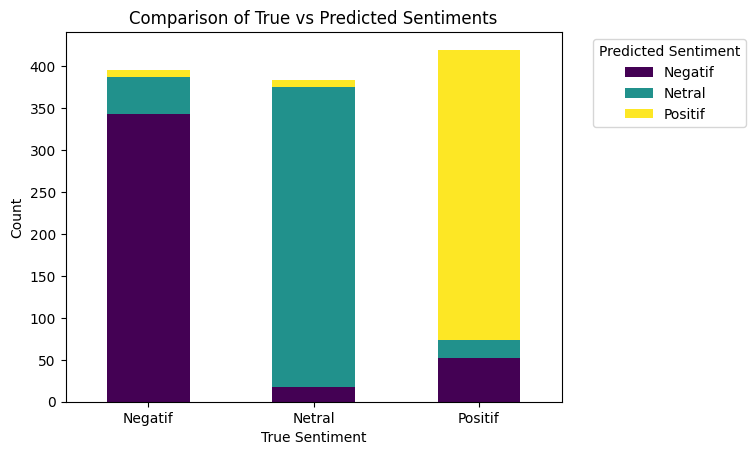

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (60:40)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.40,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 50:50**

Random Forest Accuracy: 0.8553333333333333
Random Forest Precision: 0.8621503727581901
Random Forest Recall: 0.8553333333333333
Random Forest F1 Score: 0.8552428822456514
Confusion Matrix for Random Forest:
[[422  62  13]
 [ 23 455  11]
 [ 74  34 406]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.81      0.85      0.83       497
      Netral       0.83      0.93      0.87       489
     Positif       0.94      0.79      0.86       514

    accuracy                           0.86      1500
   macro avg       0.86      0.86      0.86      1500
weighted avg       0.86      0.86      0.86      1500



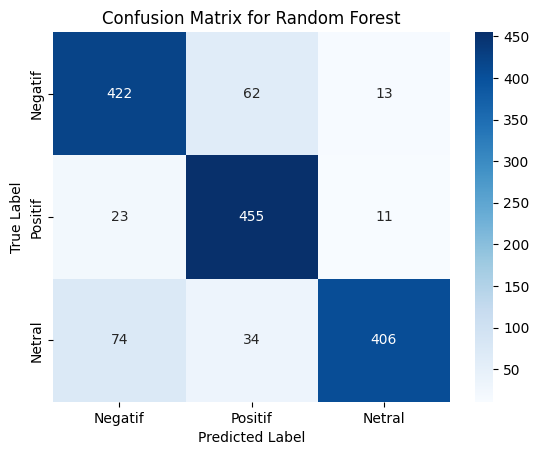

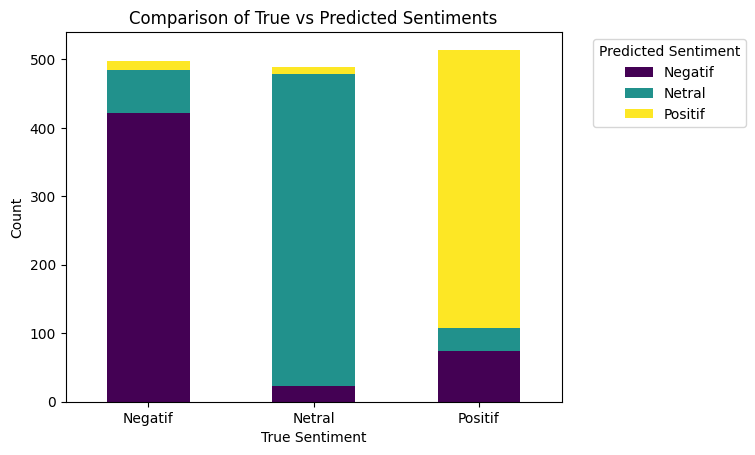

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (50:50)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.50,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 40:60**

Random Forest Accuracy: 0.8377777777777777
Random Forest Precision: 0.8435370067864801
Random Forest Recall: 0.8377777777777777
Random Forest F1 Score: 0.8376336640743728
Confusion Matrix for Random Forest:
[[498  87  24]
 [ 29 532  21]
 [ 80  51 478]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.82      0.82      0.82       609
      Netral       0.79      0.91      0.85       582
     Positif       0.91      0.78      0.84       609

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800



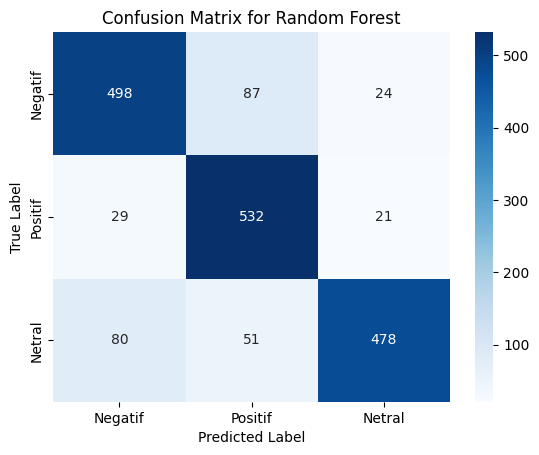

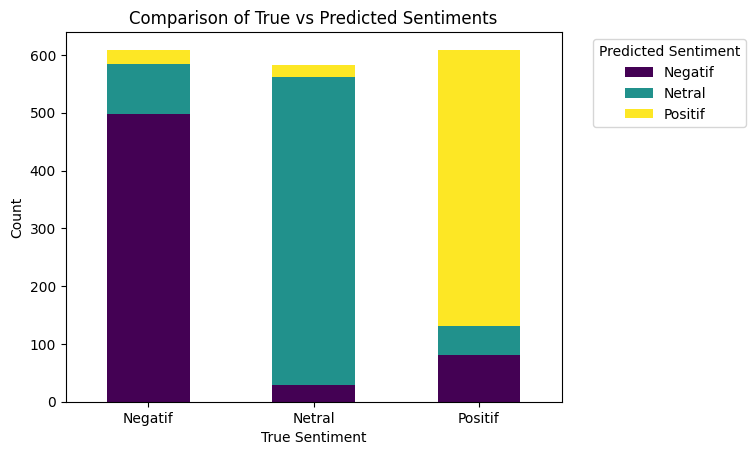

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (40:60)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.60,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 30:70**

Random Forest Accuracy: 0.8342857142857143
Random Forest Precision: 0.8403143304963874
Random Forest Recall: 0.8342857142857143
Random Forest F1 Score: 0.8340844527308903
Confusion Matrix for Random Forest:
[[573 102  32]
 [ 35 626  24]
 [ 86  69 553]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.83      0.81      0.82       707
      Netral       0.79      0.91      0.84       685
     Positif       0.91      0.78      0.84       708

    accuracy                           0.83      2100
   macro avg       0.84      0.84      0.83      2100
weighted avg       0.84      0.83      0.83      2100



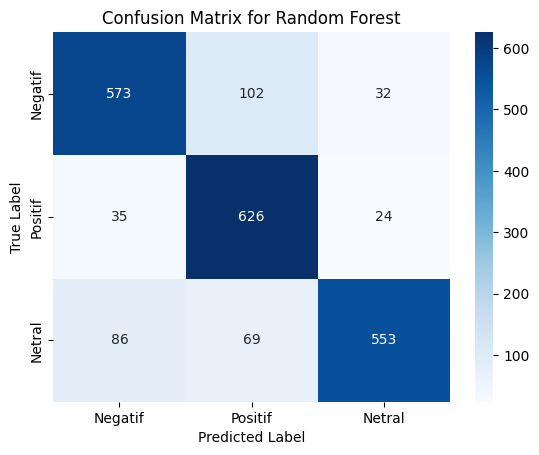

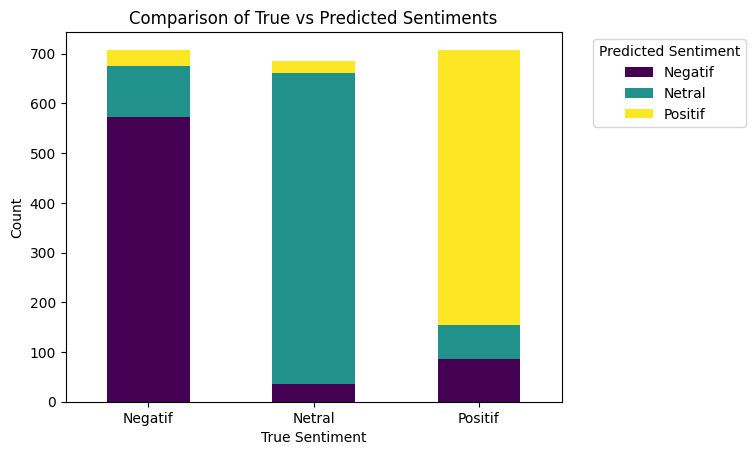

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (30:70)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.70,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 20:80**

Random Forest Accuracy: 0.8029166666666666
Random Forest Precision: 0.8099471323697617
Random Forest Recall: 0.8029166666666666
Random Forest F1 Score: 0.8026575908329829
Confusion Matrix for Random Forest:
[[609 144  41]
 [ 39 696  46]
 [112  91 622]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.80      0.77      0.78       794
      Netral       0.75      0.89      0.81       781
     Positif       0.88      0.75      0.81       825

    accuracy                           0.80      2400
   macro avg       0.81      0.80      0.80      2400
weighted avg       0.81      0.80      0.80      2400



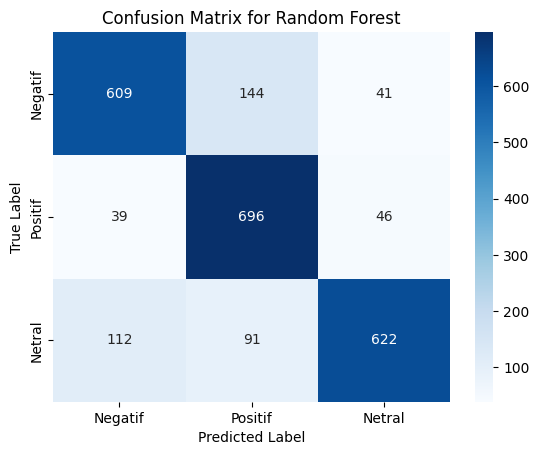

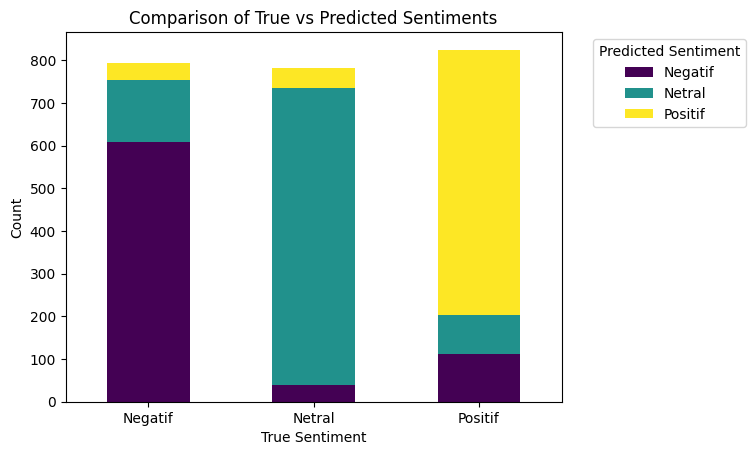

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (20:80)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.80,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**RASIO 10:90**

Random Forest Accuracy: 0.7548148148148148
Random Forest Precision: 0.7770939231406734
Random Forest Recall: 0.7548148148148148
Random Forest F1 Score: 0.7535038593360984
Confusion Matrix for Random Forest:
[[634 215  41]
 [ 56 806  28]
 [149 173 598]]

Classification Report for Random Forest:
               precision    recall  f1-score   support

     Negatif       0.76      0.71      0.73       890
      Netral       0.68      0.91      0.77       890
     Positif       0.90      0.65      0.75       920

    accuracy                           0.75      2700
   macro avg       0.78      0.76      0.75      2700
weighted avg       0.78      0.75      0.75      2700



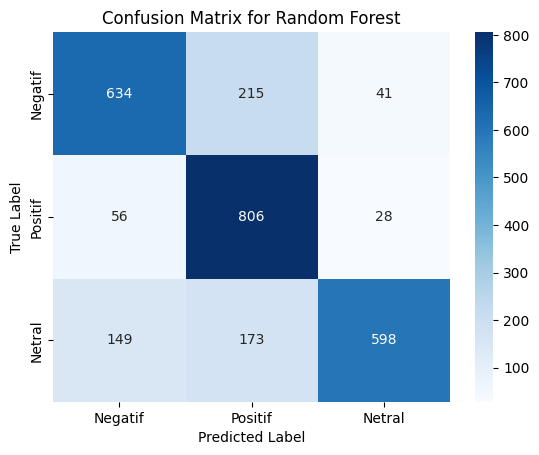

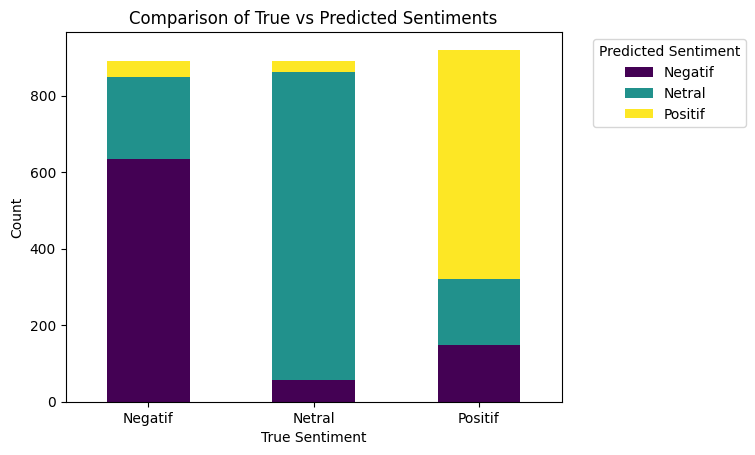

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Membagi data menjadi data training dan testing (10:90)
X_train, X_test, y_train, y_test = train_test_split(df['Ulasan'], df['Sentiments'],
                                                    test_size=0.90,
                                                    random_state=0)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(tfidf_train, y_train)

# Melakukan prediksi pada data testing
y_pred_rf = rf_model.predict(tfidf_test)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Confusion Matrix untuk Random Forest
print("Confusion Matrix for Random Forest:")
print(cm_rf)

# Classification Report untuk Random Forest
print('\nClassification Report for Random Forest:\n', classification_report(y_test, y_pred_rf, zero_division=0))

# Visualisasi Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=pd.unique(y_test), yticklabels=pd.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Visualisasi Perbandingan Sentimen Asli vs Prediksi
df_test = pd.DataFrame({'True Sentiment': y_test, 'Predicted Sentiment': y_pred_rf})
sentiment_comparison = df_test.groupby(['True Sentiment', 'Predicted Sentiment']).size().unstack(fill_value=0)
sentiment_comparison.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('True Sentiment')
plt.ylabel('Count')
plt.title('Comparison of True vs Predicted Sentiments')
plt.xticks(rotation=0)
plt.legend(title='Predicted Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**MENAMPILKAN JUMLAH SENTIMEN**

In [ ]:
# Menampilkan jumlah sentimen positif dan negatif
jumlah_sentimen = df['Sentiments'].value_counts()
print("Jumlah Sentimen Positif, Negatif dan Netral:")
print(jumlah_sentimen)

Jumlah Sentimen Positif, Negatif dan Netral:
Sentiments
Negatif    1000
Positif    1000
Netral     1000
Name: count, dtype: int64


**WORDCLOUD**

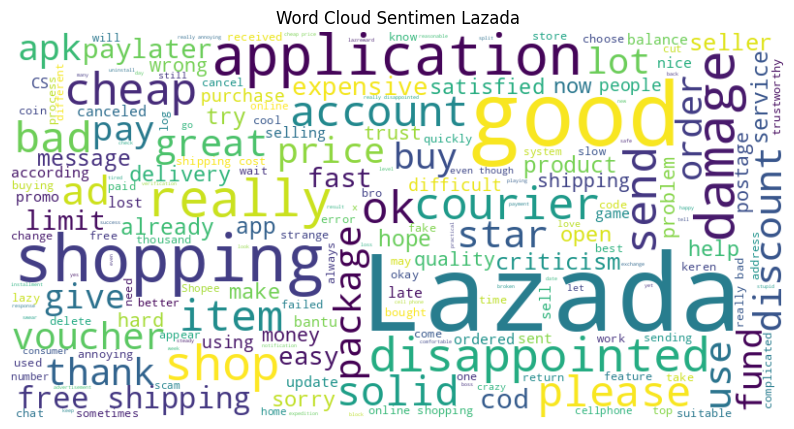

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk visualisasi word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

# Contoh data untuk visualisasi word cloud
all_comments = ' '.join(df['Ulasan'])

# Visualisasi word cloud untuk komentar
plot_word_cloud(all_comments, 'Word Cloud Sentimen Lazada')

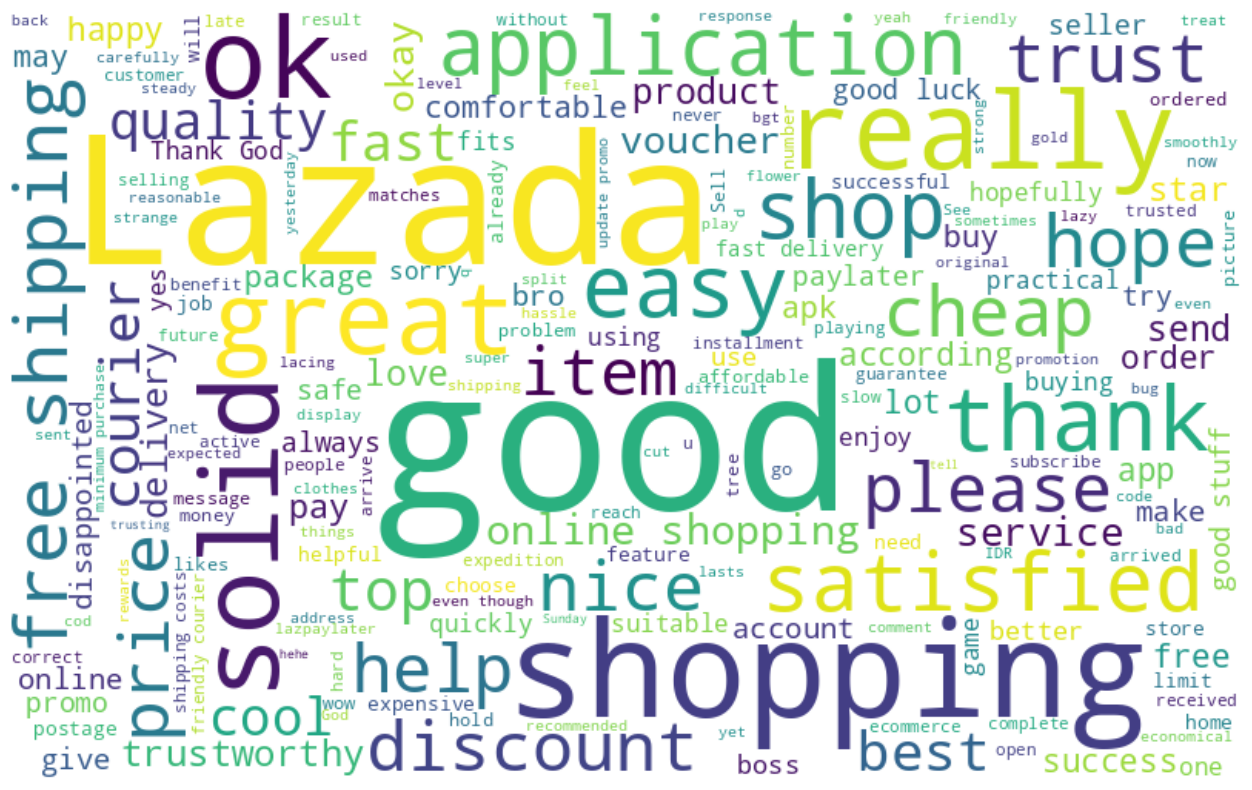

In [ ]:
df_p=df[df['Sentiments']== "Positif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

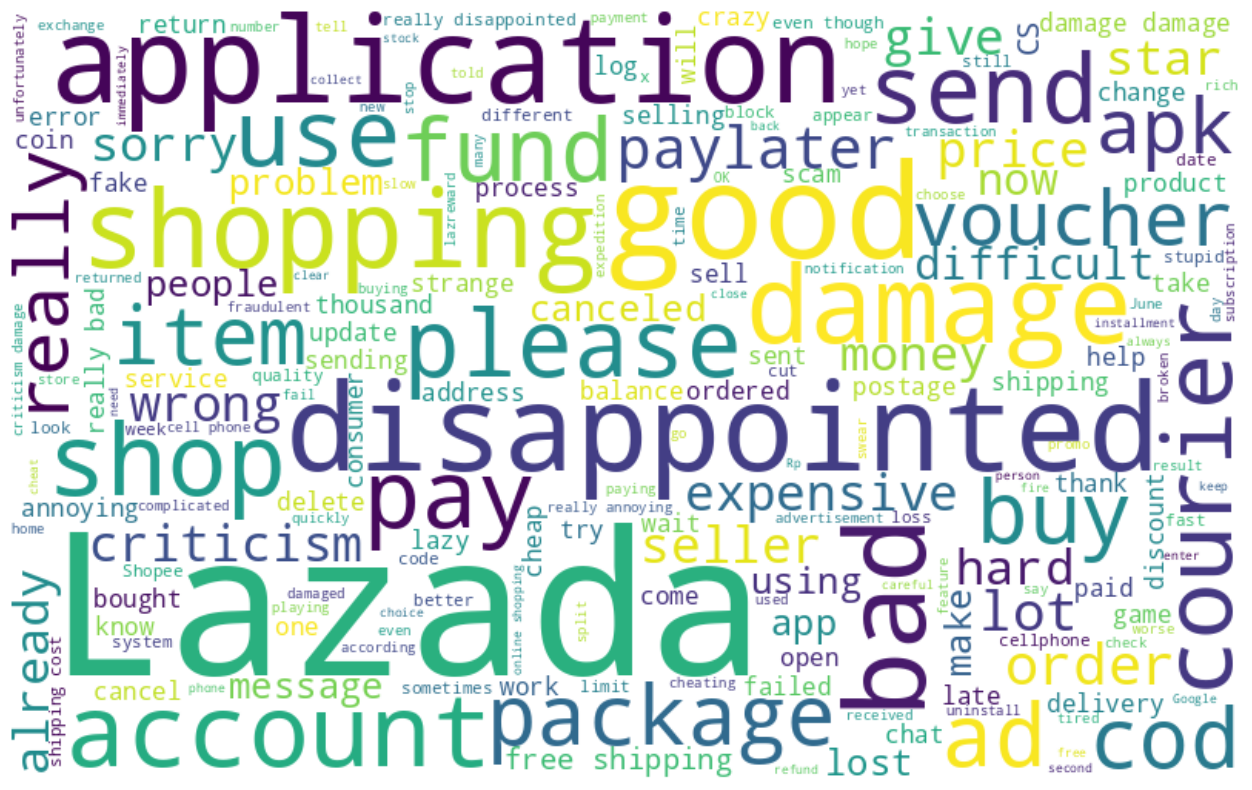

In [ ]:
df_p=df[df['Sentiments']== "Negatif"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

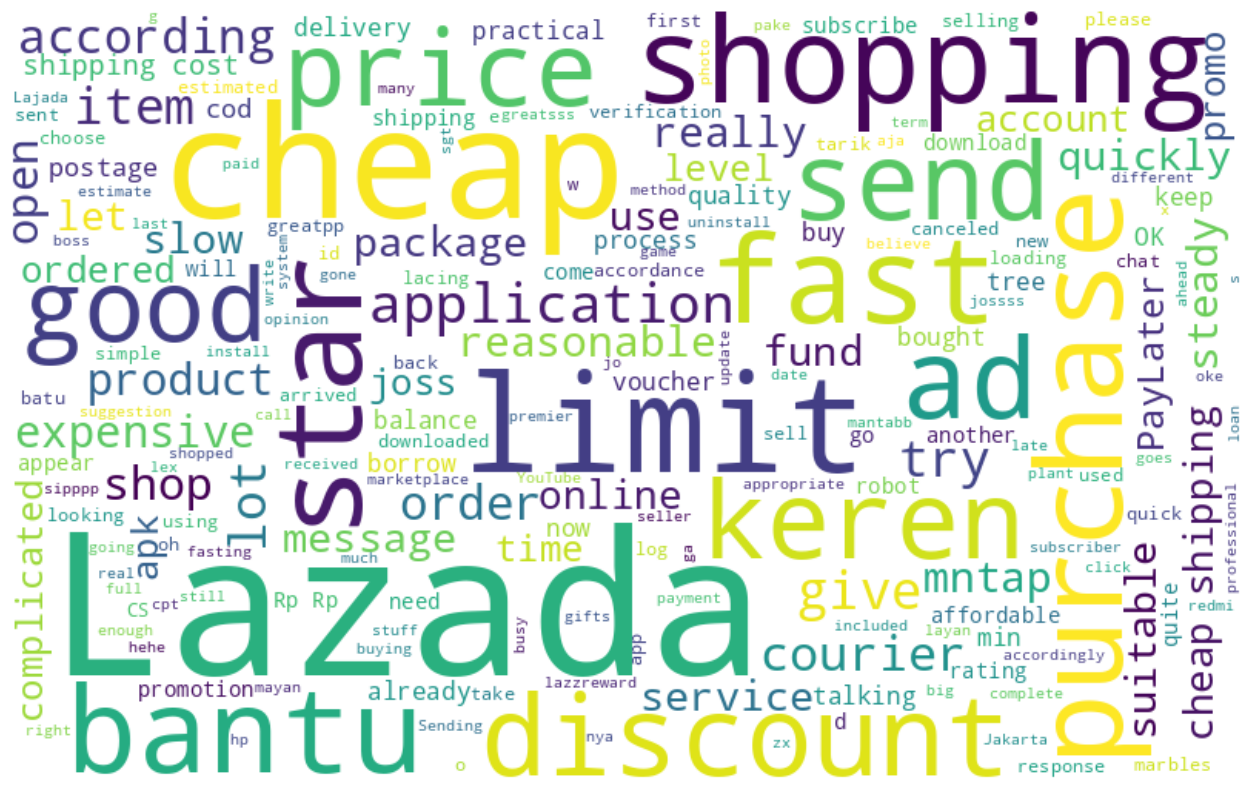

In [ ]:
df_p=df[df['Sentiments']== "Netral"]
all_words_lem = ' '.join([word for word in df_p['Ulasan']])
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(all_words_lem)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');